# Frontera Eficiente y Teoría de Markowitz

---

## I. Teoría Moderna de Portafolio (MPT)
La **Teoría Moderna de Portafolio**, desarrollada por **Harry Markowitz** en 1952, es un marco matemático que busca **construir portafolios eficientes**, es decir, combinaciones de activos que **maximizan el rendimiento esperado** dado un nivel de riesgo (volatilidad), o **minimizan el riesgo** para un determinado nivel de rendimiento.

#### Fundamento Clave: Diversificación
La idea central de la MPT es que **diversificar tus inversiones reduce el riesgo total**, ya que los activos no se mueven exactamente igual. Incluso si algunos activos tienen alta volatilidad, una combinación adecuada de ellos puede resultar en un portafolio más estable.


## II. Definiciones básicas

Supongamos que tenemos **$N$ activos financieros** diferentes.
   - $ w = \mathbf({w_1,w_2,...,w_N})^T $: vector de **pesos** del portafolio.
   - Cada $w_i$ representa la proporción del capital invertido en el activo $i$.

   En una estrategia long-only, se cumple: 

$$ w_i \geq 0, \sum_{i=1}^N w_i = 1 $$

---

## III. Rendimiento esperado del portafolio
El rendimiento total del portafolio es una **combinación lineal de los rendimientos de los activos individuales**:
$$
R_p = \sum_{i=1}^N w_i R_i = \mathbf{w}^T \mathbf{R},
$$

   - Sea $\mathbf{R} = (R_1, R_2, \dots, R_N)^T$ el vector de **retornos esperados** de cada activo.


## IV. Riesgo (volatilidad) del portafolio
El riesgo o volatilidad del portafolio depende tanto de las varianzas individuales como de las **covarianzas** entre los activos:

$$
\sigma_p = \sqrt{ \mathbf{w}^T \Sigma \mathbf{w} }.
$$

   - Sea $\Sigma$ la matriz de **covarianzas** de los activos.


---

## V. Frontera eficiente

La **frontera eficiente** es el conjunto de portafolios que ofrecen el **mayor rendimiento esperado** para un nivel de riesgo dado, o el **menor riesgo posible** para un nivel de rendimiento esperado.

![Frontera Eficiente](data/efficient_frontier.png)

En un gráfico de **rendimiento vs. riesgo**, la frontera eficiente es una **curva ascendente**. Cualquier portafolio por debajo de esta frontera se considera **ineficiente**.

---

## VI. Efecto de la correlación entre activos en el portafolio

Una de las ideas más poderosas de la MPT es que el **riesgo del portafolio depende no solo del riesgo individual de cada activo, sino también de cómo se relacionan entre ellos**, es decir, su **correlación**.

### 1. ¿Qué es la correlación?
La **correlación** mide la relación lineal entre los retornos de dos activos:

- $\rho_{ij} = 1$: se mueven exactamente igual.  
- $\rho_{ij} = 0$: no hay relación.  
- $\rho_{ij} = -1$: se mueven en direcciones opuestas.  

### 2. Impacto en el portafolio

Supón dos activos con igual riesgo individual ($\sigma_1 = \sigma_2$), pero diferente correlación:

- Si $\rho = 1$: el riesgo del portafolio no se reduce con la combinación.
- Si $\rho < 1$: hay una **reducción del riesgo**, mayor cuanto más baja sea la correlación.
- Si $\rho < 0$: el portafolio puede tener un **riesgo menor** incluso que los activos individuales.

### 3. Fórmula para dos activos

Para dos activos $A$ y $B$ con pesos $w_A$, $w_B$, varianzas $\sigma_A^2$, $\sigma_B^2$ y correlación $\rho_{AB}$:
$$
\sigma_p^2 = w_A^2 \sigma_A^2 + w_B^2 \sigma_B^2 + 2 w_A w_B \rho_{AB} \sigma_A \sigma_B
$$

**Conclusión**: Si combinas activos con **baja correlación**, puedes obtener un portafolio con **menos riesgo que cualquier activo por separado**. Esta es la base de la **diversificación inteligente**.

---

### Finding the optimal portfolios: Global Minimum Volatility Portfolio

In the experiments above, we found the optimal portfolios, i.e., the ones on the efficient frontier, by **simulating a high number of portfolios** and then plotting them. From the plot we could see what the efficient frontier looked like. 
However, we can find an optimal portfolio on the efficient frontier by **solving a minimization problem**, 
for example, by applying the **scipy optimize** method. 


For example, suppose we want to **find the portfolio (on the efficient frontier) which has the minimum volatility**. 
Then the minimization problem is:
$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$

### Finding the optimal portfolios: maximizing the sharpe ratio 

Now, consider the case of finding **the portfolio (on the efficient frontier) with the highest sharpe ratio**. 

Note that scipy offers a **minimize** method, but no a **maximize** a method, and we may then conclude 
that we are not able to find such a portfolio by solving an optimization problem. 
However, **the maximization of the sharpe ratio is nothing but the minimization of the negative sharpe ratio**. 
That is, we have 
$$
\text{minimize} \;\; -  \frac{R_p - r_f}{\sigma_p} =: -\text{SR} 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$

---

---

In [1]:
# Librerías a utilizar
import pandas as pd
import numpy as np

import scipy
from scipy import stats

# Datetime
import datetime as dt

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker

import seaborn as sns
import ipywidgets as widgets

# Archivo personalizado
import edhec_kit as erk

Efecto de la correlación en el riesgo y retorno

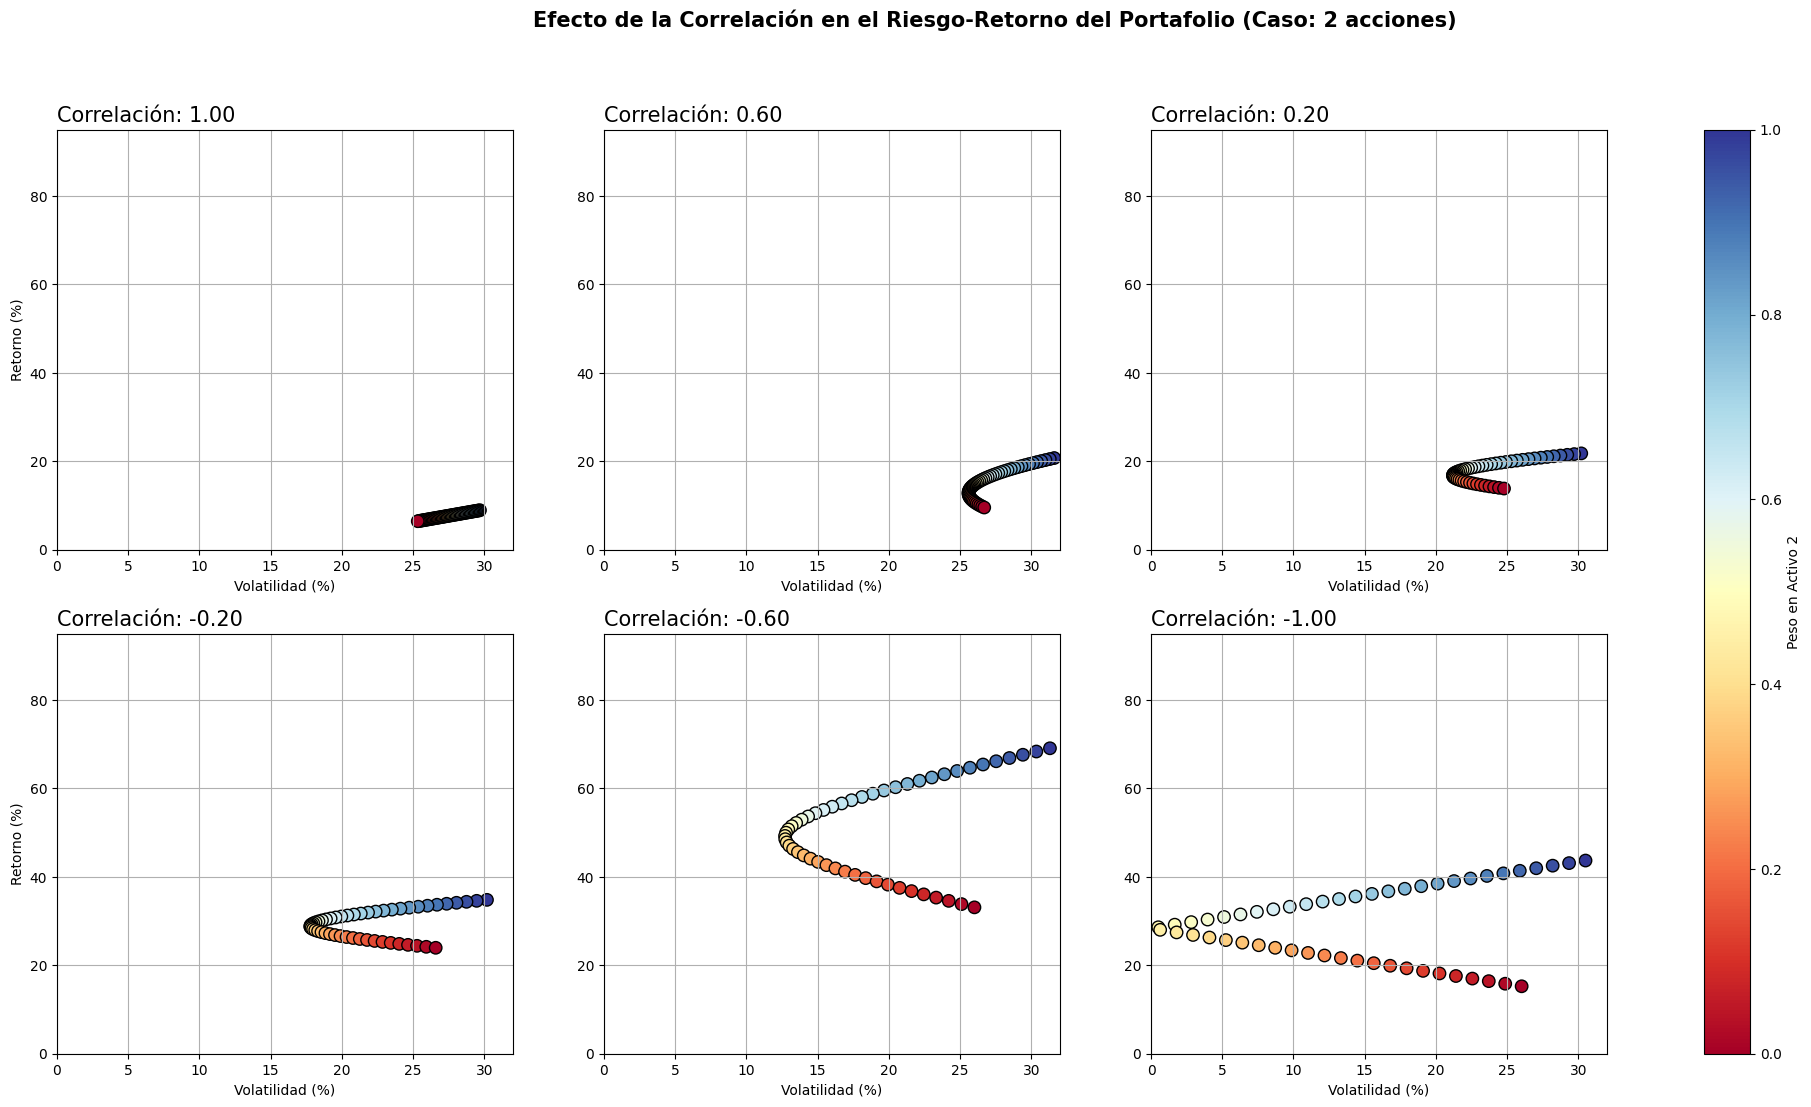

In [2]:
# PARÁMETROS BASE
n_rendimientos = 500
periodos_por_año = 252
risk_free_rate = 0

# Supuestos de retorno y volatilidad
retorno_1 = 0.001019
retorno_2 = 0.001249
vol_1 = 0.016317
vol_2 = 0.019129

# Correlaciones a evaluar
rhos = np.linspace(1, -1, num=6)
n_corrs = len(rhos)

# Combinaciones de pesos (portafolio long-only)
n_pesos = 50
w1 = np.linspace(0, 1, num=n_pesos)
w2 = 1 - w1
pesos = pd.DataFrame({'w1': w1, 'w2': w2})

# Semilla para reproducibilidad
np.random.seed(1)

# FUNCIONES AUXILIARES

def annualize_rets(daily_rets, periods=252):
    return daily_rets.mean() * periods

def portfolio_return(weights, annualized_returns):
    return np.dot(weights, annualized_returns)

def annualize_vol(portfolio_daily_returns, periods=252):
    return portfolio_daily_returns.std() * np.sqrt(periods)

def sharpe_ratio(portfolio_daily_returns, rf_rate=0, periods=252):
    excess_ret = portfolio_daily_returns.mean() - rf_rate / periods
    ann_excess_ret = excess_ret * periods
    ann_vol = annualize_vol(portfolio_daily_returns, periods)
    return ann_excess_ret / ann_vol


# GRAFICAR
fig, axs = plt.subplots(2, 3, figsize=(25, 12))
axs = axs.flatten()

for idx, rho in enumerate(rhos):
    cov_ij = rho * vol_1 * vol_2
    cov_matrix = np.array([[vol_1**2, cov_ij], [cov_ij, vol_2**2]])
    mean_returns = np.array([retorno_1, retorno_2])

    # Simulación de rendimientos diarios con correlación específica
    daily_returns = np.random.multivariate_normal(mean_returns, cov_matrix, n_rendimientos)
    daily_df = pd.DataFrame(daily_returns, columns=["Activo 1", "Activo 2"])

    resultados = []

    for i in range(len(pesos)):
        w = pesos.loc[i].values
        port_ret = portfolio_return(w, annualize_rets(daily_df, periodos_por_año))
        port_vol = annualize_vol(daily_df @ w, periodos_por_año)
        port_sharpe = sharpe_ratio(daily_df @ w, risk_free_rate, periodos_por_año)
        resultados.append([port_ret, port_vol, port_sharpe, w[0], w[1]])

    port_df = pd.DataFrame(resultados, columns=["Retorno", "Volatilidad", "Sharpe", "w1", "w2"])

    sc = axs[idx].scatter(port_df["Volatilidad"]*100,
                          port_df["Retorno"]*100,
                          c=port_df["w2"],
                          cmap='RdYlBu',
                          edgecolor='black',
                          s=80)

    axs[idx].set_title(f"Correlación: {rho:.2f}", fontsize=15, loc='left')
    axs[idx].set_xlabel("Volatilidad (%)", fontsize=10)
    if idx % 3 == 0:
        axs[idx].set_ylabel("Retorno (%)", fontsize=10)
    axs[idx].grid(True)
    axs[idx].set_xlim([0, 32])
    axs[idx].set_ylim([0, 95])


fig.colorbar(sc, ax=axs.ravel().tolist(), label='Peso en Activo 2')
fig.suptitle("Efecto de la Correlación en el Riesgo-Retorno del Portafolio (Caso: 2 acciones)",fontweight='bold', fontsize=15)
plt.show()


Cargamos el archivo de Ken French que contiene rendimientos de 30 carteras industriales diferentes.

In [3]:
ind30 = erk.get_ind_returns()
ind30.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


Cargue la base de datos de retornos mensuales de hedge funds (HFI).

In [4]:
er = erk.annualize_rets(ind30['2005':'2015'], 12)

# Matriz de Covarianza
cov = ind30['2005': '2015'].cov()

Gráficos para diferentes portafolios

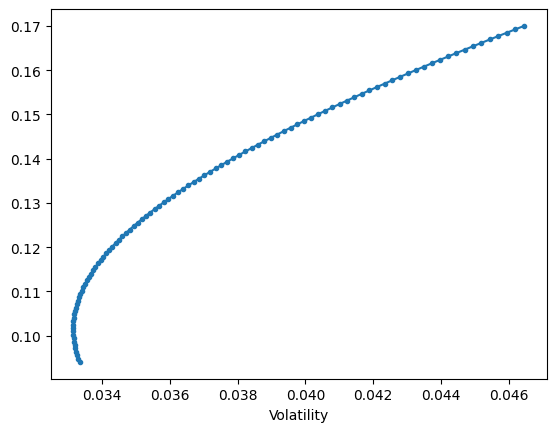

In [5]:
# Portafolio 1
caso_1 = ['Food', 'Smoke']
erk.plot_ef(100, er[caso_1], cov.loc[caso_1, caso_1])

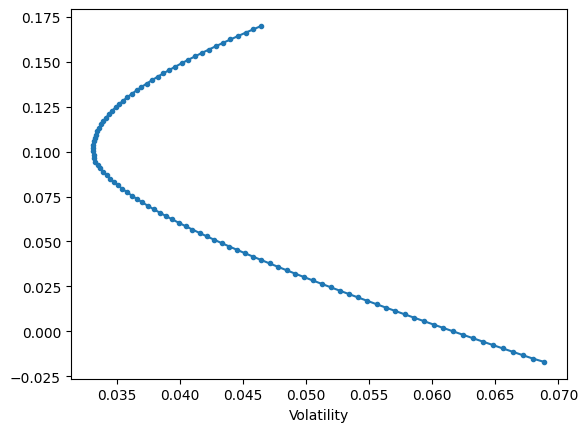

In [6]:
# Portafolio 2
caso_2 = ['Food', 'Smoke', 'Books', 'Chems', 'Steel']
erk.plot_ef(100, er[caso_2], cov.loc[caso_2, caso_2])

Graficamos la CML

<Axes: xlabel='Volatility'>

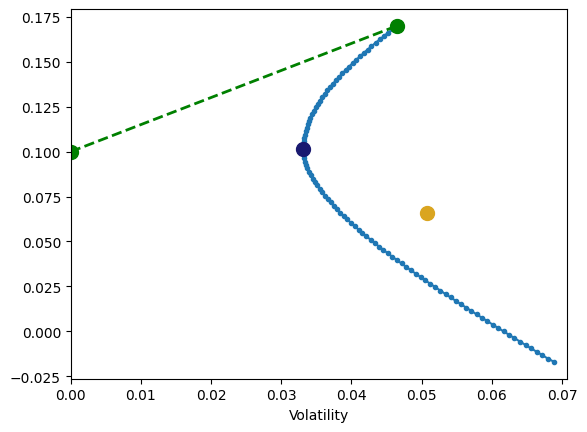

In [7]:
# Portafolio 2
erk.plot_ef(100, er[caso_2], cov.loc[caso_2, caso_2], show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

In [8]:
print('Returns:', er[caso_2].round(4).tolist())
print('Portfolio:', erk.msr(0.1, er[caso_2], cov.loc[caso_2, caso_2]).round(4).tolist())

Returns: [0.0941, 0.17, -0.017, 0.0944, -0.0127]
Portfolio: [0.0, 1.0, 0.0, 0.0, 0.0]


Caso Real: Data de  YahooFinance

In [9]:
import yfinance as yf

In [ ]:
tickers = ['AAPL', 'AMZN', 'IBM', 'JPM']
start = '2019-01-01'  # Fecha de inicio deseada
end = pd.Timestamp.now().strftime('%Y-%m-%d')

precios = yf.download(tickers, start=start, end=end, auto_adjust=True)['Close']
precios

[*********************100%***********************]  3 of 4 completed

4 Failed downloads:
[*********************100%***********************]  3 of 4 completed['AAPL', 'JPM', 'AMZN', 'IBM']: TypeError("'NoneType' object is not subscriptable")


Ticker,AAPL,AMZN,IBM,JPM
Date,,,,


In [32]:
# compute the daily returns 
daily_rets = stocks.pct_change().dropna()
daily_rets.head()

Ticker,AAPL,AMD,IBM
Date,,,


In [ ]:
# compute the mean daily returns and the covariance of daily returns of the two assets
mean_rets = daily_rets.mean()
std_rets  = daily_rets.std()
cov_rets  = daily_rets.cov()
cov_rets

,AMD,IBM,AAPL
AMD,0.001150,0.000180,0.000378
IBM,0.000180,0.000296,0.000136
AAPL,0.000378,0.000136,0.000413


In [ ]:
periods_per_year = 252
num_portfolios   = 4000
portfolios       = pd.DataFrame(columns=["return","volatility","sharpe ratio","w1","w2","w3"])
risk_free_rate   = 0

In [ ]:
for i in range(num_portfolios):
    # select random weights
    weights = np.random.random(n_assets)
    # and rescale them to sum to 1
    weights /= np.sum(weights)
    
    # annualized portfolio returns
    ann_rets      = erk.annualize_rets(daily_rets, periods_per_year)
    portfolio_ret = erk.portfolio_return(weights, ann_rets)        

    # annualized portfolio volatility
    portfolio_vol = erk.annualize_vol(daily_rets @ weights, periods_per_year)

    # annualized portfolio sharpe ratio
    portfolio_spr = erk.sharpe_ratio(daily_rets @ weights, risk_free_rate, periods_per_year)
    
    # create dataframe   
    portfolios.loc[i] = [portfolio_ret, portfolio_vol, portfolio_spr, weights[0], weights[1], weights[2]]


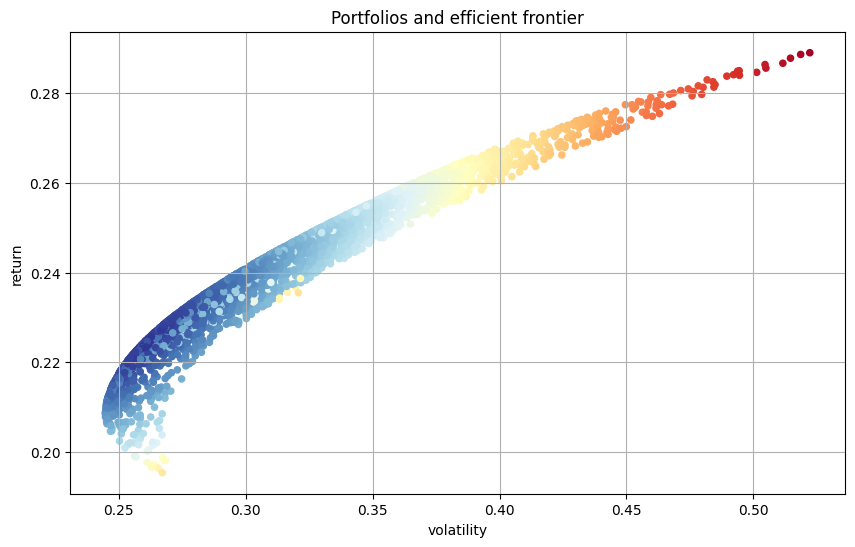

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("return")
ax.grid()
plt.show()

In [ ]:
low_vol_portfolio

return          0.208736
volatility      0.244691
sharpe ratio    0.915795
w1              0.000512
w2              0.631673
w3              0.367814
Name: 2224, dtype: float64

In [ ]:
low_vol_portfolio = portfolios.iloc[ portfolios['volatility'].idxmin() ]
print("Global Minimum Volatility Portafolio:")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )

high_sharpe_portfolio = portfolios.iloc[ portfolios['sharpe ratio'].idxmax() ]
print("\nMaximum Sharpe Ratio Portafolio:")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

Global Minimum Volatility portfolio:
- return      : 20.87%
- volatility  : 24.47%
- sharpe ratio: 0.92
\Maximum Sharpe Ratio portfolio:
- return      : 22.37%
- volatility  : 26.02%
- sharpe ratio: 0.98


<>:10: SyntaxWarning: invalid escape sequence '\M'
<>:10: SyntaxWarning: invalid escape sequence '\M'
C:\Users\josec\AppData\Local\Temp\ipykernel_2072\585312968.py:10: SyntaxWarning: invalid escape sequence '\M'
  print("\Maximum Sharpe Ratio portfolio:")
C:\Users\josec\AppData\Local\Temp\ipykernel_2072\585312968.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
C:\Users\josec\AppData\Local\Temp\ipykernel_2072\585312968.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
C:\Users\jos

In [ ]:
optimal_weights = erk.gmv(cov_rets)
print("Pesos Óptimo para el Portafolio GMV:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
  AMZN: 0.00%
  KO:   63.42%
  MSFT: 36.58%


In [ ]:
optimal_weights = erk.msr(risk_free_rate, ann_rets, cov_rets)
print("Pesos Óptimo para el Portafolio MSR:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
  AMZN: 7.40%
  KO:   50.90%
  MSFT: 41.69%
